-The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

-Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
ds=pd.read_csv("/content/drive/MyDrive/CodSoft Internship Program/Iris Flower dataset/IRIS.csv")

In [ ]:
ds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#Data cleaning

In [ ]:
# Check for missing values
print(ds.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


No null values found

In [ ]:
# Check data types
print(ds.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [ ]:
# Encode categorical variable 'species'
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ds['species_encoded'] = label_encoder.fit_transform(ds['species'])

# Display the cleaned dataset
print(ds.head())


   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

   species_encoded  
0                0  
1                0  
2                0  
3                0  
4                0  


In [ ]:
# Drop the original 'species' column
ds.drop(columns=['species'], inplace=True)

# Display the updated dataset
print(ds.head())


   sepal_length  sepal_width  petal_length  petal_width  species_encoded
0           5.1          3.5           1.4          0.2                0
1           4.9          3.0           1.4          0.2                0
2           4.7          3.2           1.3          0.2                0
3           4.6          3.1           1.5          0.2                0
4           5.0          3.6           1.4          0.2                0


#Visualizing Sepal and Petal Measurements

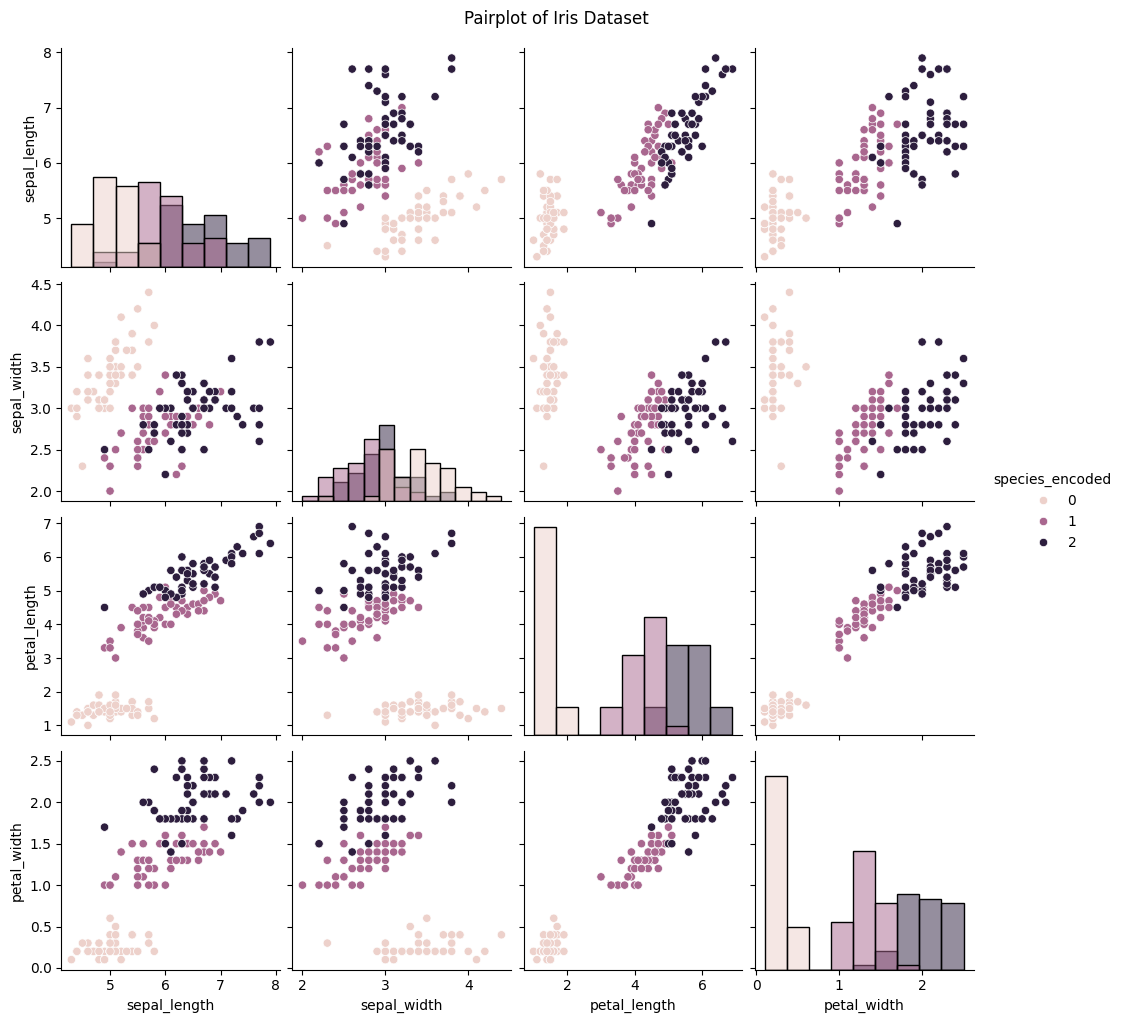

In [ ]:
# Pairplot to visualize relationships between features colored by species
sns.pairplot(ds, hue='species_encoded', diag_kind='hist')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()


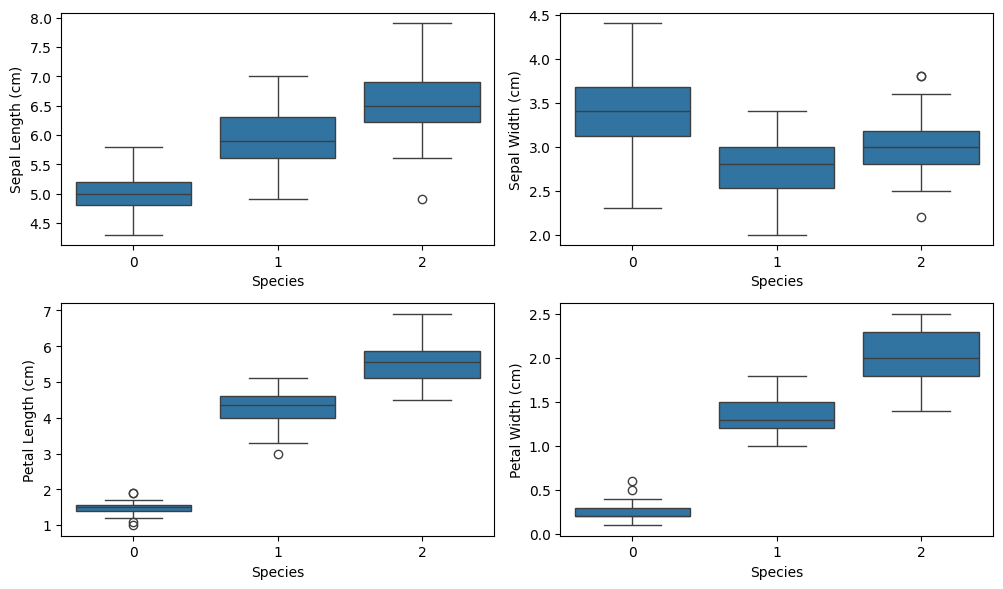

In [ ]:
# Boxplot to visualize distribution of sepal and petal measurements by species
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.boxplot(x='species_encoded', y='sepal_length', data=ds)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')

plt.subplot(2, 2, 2)
sns.boxplot(x='species_encoded', y='sepal_width', data=ds)
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')

plt.subplot(2, 2, 3)
sns.boxplot(x='species_encoded', y='petal_length', data=ds)
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')

plt.subplot(2, 2, 4)
sns.boxplot(x='species_encoded', y='petal_width', data=ds)
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()


Random Forests are a choice, for the Iris dataset because they can effectively manage class classification interpret the importance of features prevent overfitting through ensemble learning capture complex relationships between features and deliver strong performance, with minimal tuning. This makes them well suited for this classification task.

#Random Forest Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate features (X) and target (y)
X = ds.drop(columns=['species_encoded'])
y = ds['species_encoded']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Accuracy Score: 1.0


Accuracy Score: The model achieved perfect accuracy of 1.0 (or 100%) on the test set, indicating that it correctly classified all instances of Iris flowers into their respective species.

Classification Report: Precision, recall, and F1-score metrics show perfect scores across all classes (setosa, versicolor, virginica), indicating precise and reliable predictions.

Confusion Matrix: The matrix confirms zero errors in classification, with all predicted labels matching the actual labels.